# NE 630 - Lesson 3

## Fission Fragment Distribution

<img src="ff_distn.jpg" alt="Fission Fragment Distribution" width="800"/>

In the legend, *pcm* stands for percent-milli, or one thousandth of one percent, or $10^{-5}$.  1000 pcm is 1%.

Image from Paul Reuss, *Neutron Physics*, EDP Sciences (2008)

## Decay Examples

### Decay with Constant Production

$$
\frac{dN}{dt} = -\lambda N(t) + R_0 \, , \qquad N(0) = N_0 \, .
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
N_0 = 1;  R_0 = 1;  lamda = 0.1

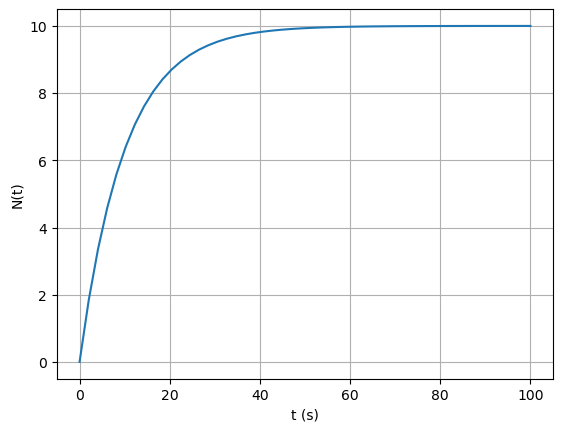

In [2]:
t = np.linspace(0, 100)
N = lambda t: (R_0/lamda)*(1-np.exp(-lamda*t))
plt.plot(t, N(t)); plt.xlabel('t (s)'); plt.ylabel('N(t)'); plt.grid(True);

## Decay Chain

$$
 {}^{94}\text{Sr} \xrightarrow{1.255~\text{m}} {}^{94}\text{Y} \xrightarrow{18.7~\text{m}} {}^{94}\text{Zr} \, 
$$

In [5]:
lam_Sr = np.log(2)/(1.255*60)
lam_Y = np.log(2)/(18.7*60)
N_0 = 1e6 # N_Sr(0)

In [6]:
N_Sr = lambda t:  N_0 * np.exp(-lam_Sr*t)
N_Y  = lambda t: (lam_Sr*N_0)/(lam_Y-lam_Sr)*(np.exp(-lam_Sr*t)-np.exp(-lam_Y*t))
N_Zr = lambda t: (lam_Sr*lam_Y*N_0)/(lam_Y-lam_Sr)*((1-np.exp(-lam_Sr*t))/lam_Sr - (1-np.exp(-lam_Y*t))/lam_Y)

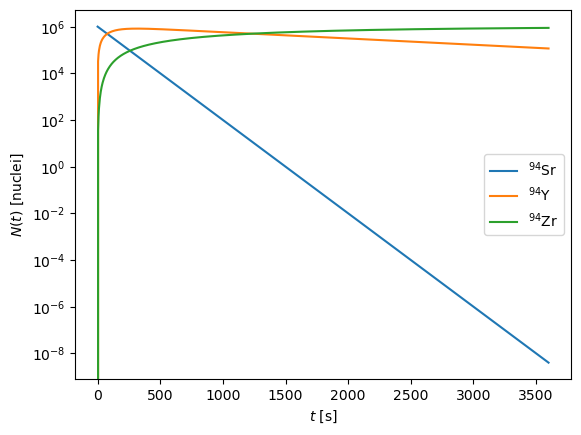

In [8]:
t = np.linspace(0, 3600, 1000)
plt.plot(t, N_Sr(t), label="${}^{94}$Sr")
plt.plot(t, N_Y(t),  label="${}^{94}$Y")
plt.plot(t, N_Zr(t), label="${}^{94}$Zr")
plt.xlabel("$t$ [s]"); plt.ylabel("$N(t)$ [nuclei]")
plt.yscale("log")
plt.legend();

**Sanity Check**: What do we *expect* the number of Zr-94 to be approximately?

**Numerical Check**:

In [9]:
def dNdt(N, t):
    N_Sr, N_Y, N_Zr = N # unpack the 3 values
    dN_Sr_dt = -lam_Sr*N_Sr
    dN_Y_dt = -lam_Y*N_Y + lam_Sr*N_Sr
    dN_Zr_dt = lam_Y*N_Y
    return [dN_Sr_dt, dN_Y_dt, dN_Zr_dt]

In [10]:
from scipy.integrate import odeint 
sol = odeint(dNdt, y0=[1.0e6, 0.0, 0.0], t=t)

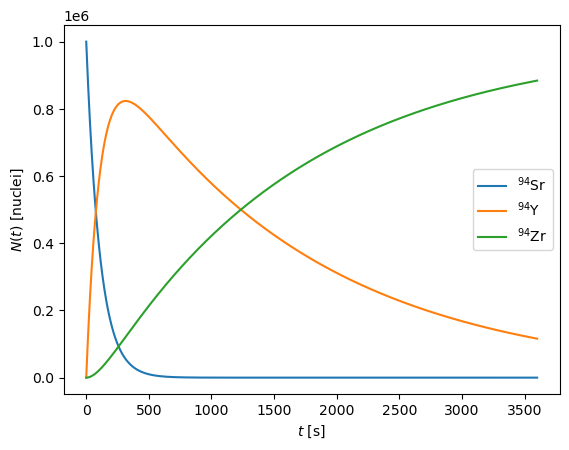

In [11]:
N_Sr_num = sol[:, 0]; N_Y_num = sol[:, 1]; N_Zr_num = sol[:, 2];
plt.plot(t, N_Sr_num, label="${}^{94}$Sr")
plt.plot(t, N_Y_num,  label="${}^{94}$Y")
plt.plot(t, N_Zr_num, label="${}^{94}$Zr")
plt.xlabel("$t$ [s]"); plt.ylabel("$N(t)$ [nuclei]")
#plt.yscale("log")
plt.legend();

Virtually indistinguishable from the analytical result.